In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [4]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [5]:
#Beginning Data Retrieval
print("Beginning Data Retrieval ")
print("-----------------------------")
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : khed brahma
Processing Record 2 of Set 1 : butaritari
Processing Record 3 of Set 1 : yellowknife
Processing Record 4 of Set 1 : salina cruz
Processing Record 5 of Set 1 : qaanaaq
Processing Record 6 of Set 1 : sabzevar
Processing Record 7 of Set 1 : kapaa
Processing Record 8 of Set 1 : chokurdakh
Processing Record 9 of Set 1 : port lincoln
City not found. Skipping...
Processing Record 10 of Set 1 : narsaq
Processing Record 11 of Set 1 : samarai
Processing Record 12 of Set 1 : tasiilaq
Processing Record 13 of Set 1 : arraial do cabo
City not found. Skipping...
Processing Record 14 of Set 1 : waipawa
Processing Record 15 of Set 1 : avarua
Processing Record 16 of Set 1 : punta arenas
Processing Record 17 of Set 1 : sapele
Processing Record 18 of Set 1 : esperance
Processing Record 19 of Set 1 : ingham
Processing Record 20 of Set 1 : karpathos
Processing Record 21 of Set 1 : sinnamary
Processing Record 2

Processing Record 35 of Set 4 : vanimo
Processing Record 36 of Set 4 : maningrida
City not found. Skipping...
Processing Record 37 of Set 4 : mandalgovi
Processing Record 38 of Set 4 : jijiang
City not found. Skipping...
Processing Record 39 of Set 4 : zyryanka
Processing Record 40 of Set 4 : dikson
Processing Record 41 of Set 4 : saskylakh
Processing Record 42 of Set 4 : savonlinna
Processing Record 43 of Set 4 : mahon
Processing Record 44 of Set 4 : atar
Processing Record 45 of Set 4 : lodwar
Processing Record 46 of Set 4 : mizdah
Processing Record 47 of Set 4 : lompoc
Processing Record 48 of Set 4 : ballina
Processing Record 49 of Set 4 : lasa
Processing Record 50 of Set 4 : eirunepe
City not found. Skipping...
Processing Record 0 of Set 5 : nantucket
Processing Record 1 of Set 5 : khambhaliya
Processing Record 2 of Set 5 : palimbang
Processing Record 3 of Set 5 : sao lourenco do oeste
Processing Record 4 of Set 5 : bethel
Processing Record 5 of Set 5 : umm kaddadah
Processing Recor

Processing Record 17 of Set 8 : severo-kurilsk
Processing Record 18 of Set 8 : tierra colorada
Processing Record 19 of Set 8 : saint pete beach
Processing Record 20 of Set 8 : thunder bay
Processing Record 21 of Set 8 : sibenik
Processing Record 22 of Set 8 : vila velha
Processing Record 23 of Set 8 : bowen
Processing Record 24 of Set 8 : maraa
Processing Record 25 of Set 8 : talaya
Processing Record 26 of Set 8 : yuancheng
Processing Record 27 of Set 8 : manggar
Processing Record 28 of Set 8 : jutai
Processing Record 29 of Set 8 : gondanglegi
Processing Record 30 of Set 8 : inta
Processing Record 31 of Set 8 : pasighat
Processing Record 32 of Set 8 : cockburn town
Processing Record 33 of Set 8 : biak
Processing Record 34 of Set 8 : lavumisa
Processing Record 35 of Set 8 : natchitoches
Processing Record 36 of Set 8 : erenhot
Processing Record 37 of Set 8 : katsuura
Processing Record 38 of Set 8 : horsham
Processing Record 39 of Set 8 : kabelvag
Processing Record 40 of Set 8 : urengoy
P

In [6]:
#creating database from pulled information
weather_df = pd.DataFrame({
    "City": city_name_list,
    "Cloudiness" : cloudiness_list,
    "Country" : country_list,
    "Date" : date_list,
    "Humidity" : humidity_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : max_temp_list,
    "Wind Speed" : wind_speed_list
})
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Khedbrahma,100,IN,1627948474,90,24.0333,73.0500,77.31,9.69
1,Butaritari,57,KI,1627948474,73,3.0707,172.7902,82.42,4.14
2,Yellowknife,75,CA,1627948372,22,62.4560,-114.3525,90.12,6.91
3,Salina Cruz,87,MX,1627948474,60,16.1667,-95.2000,88.97,8.93
4,Qaanaaq,94,GL,1627948474,66,77.4840,-69.3632,45.27,0.78


In [7]:
weather_df.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

Analysis: As you get closer to the equator (latitude = 0) the temperatures rise. This is a pretty normal bell shaped curve


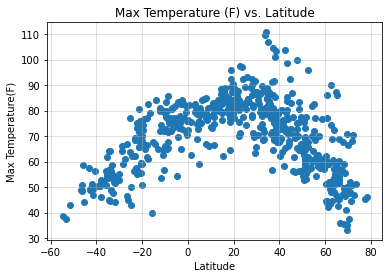

In [8]:
#Plotting Scatter Plot of Temperature vs Latitude
lat = weather_df['Lat']
temp = weather_df['Max Temp']
plt.scatter(lat, temp)
plt.title("Max Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid(alpha=.5)
plt.savefig("../Images/Max Temp vs Latitude.png")
print("Analysis: As you get closer to the equator (latitude = 0) the temperatures rise. This is a pretty normal bell shaped curve")

Analysis: The regions closer to the equator seem to have higher average levels of humidity.The further away, the more dispersed the data is.


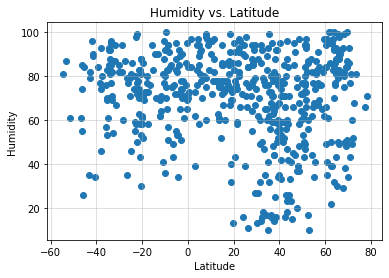

In [9]:
#Plotting Humidity vs Latitude
humidity = weather_df['Humidity']
plt.scatter(lat, humidity)
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(alpha=.5)
plt.savefig("../Images/Max Temp vs Humidity.png")
print("Analysis: The regions closer to the equator seem to have higher average levels of humidity.The further away, the more dispersed the data is.")

Analysis: There seems to be no correlation between latitude and how cloudy a city is.


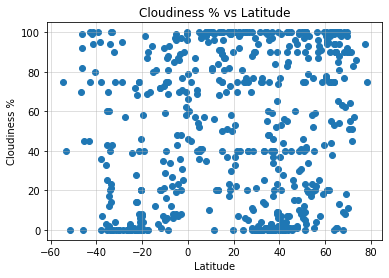

In [10]:
#Plotting Cloudiness vs Latitude
cloudiness = weather_df['Cloudiness']
plt.scatter(lat, cloudiness)
plt.title("Cloudiness % vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(alpha=.5)
plt.savefig("../Images/Cloudiness vs Latitude")
print("Analysis: There seems to be no correlation between latitude and how cloudy a city is.")

Analysis: The majority of the cities pulled seem to be under 10mph average. The higher wind speeds are in the lower portion of the northern hemisphere or the southern hemispher.


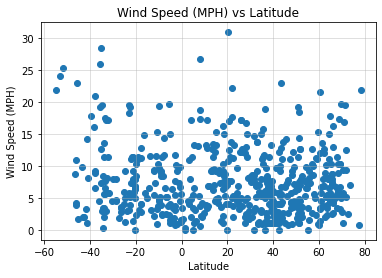

In [11]:
#Plotting Windspeed vs Latitude
wind_speed = weather_df['Wind Speed']
plt.scatter(lat, wind_speed)
plt.title("Wind Speed (MPH) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(alpha=.5)
plt.savefig("../Images/Wind Speed vs Latitude")
print("Analysis: The majority of the cities pulled seem to be under 10mph average. The higher wind speeds are in the lower portion of the northern hemisphere or the southern hemispher.")

In [12]:
northern_hemisphere_df = weather_df.loc[weather_df['Lat'] >=0]
southern_hemisphere_df = weather_df.loc[weather_df['Lat'] <0]

In [13]:
northern_hemisphere_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Khedbrahma,100,IN,1627948474,90,24.0333,73.0500,77.31,9.69
1,Butaritari,57,KI,1627948474,73,3.0707,172.7902,82.42,4.14
2,Yellowknife,75,CA,1627948372,22,62.4560,-114.3525,90.12,6.91
3,Salina Cruz,87,MX,1627948474,60,16.1667,-95.2000,88.97,8.93
4,Qaanaaq,94,GL,1627948474,66,77.4840,-69.3632,45.27,0.78
5,Sabzawār,3,IR,1627948475,17,36.2126,57.6819,77.05,11.72
6,Kapaa,7,US,1627948475,86,22.0752,-159.3190,87.78,5.01
7,Chokurdakh,55,RU,1627948475,43,70.6333,147.9167,52.16,9.37
9,Narsaq,94,GL,1627948476,96,60.9167,-46.0500,44.74,6.76
11,Tasiilaq,100,GL,1627948476,83,65.6145,-37.6368,42.64,2.44


In [14]:
southern_hemisphere_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
8,Port Lincoln,70,AU,1627948476,61,-34.7333,135.8667,53.42,19.53
10,Samarai,73,PG,1627948476,77,-10.6167,150.6667,79.93,15.39
12,Arraial do Cabo,0,BR,1627948477,80,-22.9661,-42.0278,68.58,18.28
13,Waipawa,100,NZ,1627948477,89,-41.4122,175.5153,47.03,14.25
14,Avarua,75,CK,1627948415,74,-21.2078,-159.7750,80.65,11.50
15,Punta Arenas,40,CL,1627948341,87,-53.1500,-70.9167,37.51,24.16
17,Esperance,94,AU,1627948478,81,-33.8667,121.9000,44.44,13.58
22,Bredasdorp,12,ZA,1627948479,93,-34.5322,20.0403,55.27,3.44
23,Hithadhoo,100,MV,1627948480,69,-0.6000,73.0833,81.64,4.56
25,Lüderitz,0,NA,1627948219,35,-26.6481,15.1594,66.74,2.80


In [15]:
#creating linear regression function
def linear_regression(x, y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    return line_equation
#function for annotating regression line
def annotate(line_equation, a, b):
    plt.annotate(line_equation,(a,b),fontsize=15,color="black")

The r-squared is : -0.65


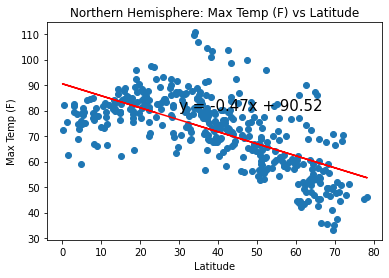

In [16]:
#Northern Hemisphere: Temp vs Latitude
equation1 = linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Max Temp'])
annotate(equation1, 30, 80)
plt.title("Northern Hemisphere: Max Temp (F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../Images/Northern Hemisphere Temp vs Lat.png")

The r-squared is : 0.8


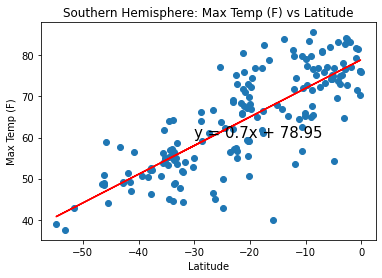

In [17]:
#Southern Hemisphere: Temp vs Latitude
equation2 = linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Max Temp'])
annotate(equation2, -30, 60)
plt.title("Southern Hemisphere: Max Temp (F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../Images/Southern Hemisphere Temp vs Lat.png")

The r-squared is : -0.08


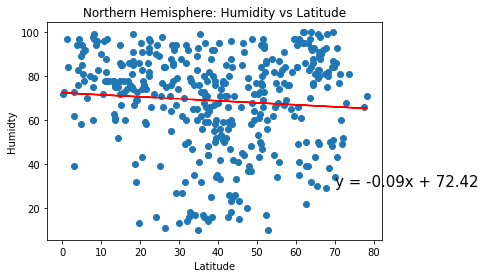

In [18]:
#Northern Hemisphere Humidty vs Latitude
equation3 = linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Humidity'])
annotate(equation3, 70, 30)
plt.title("Northern Hemisphere: Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidty")
plt.savefig("../Images/Northern Hemisphere Humidity vs Lat.png")

The r-squared is : -0.01


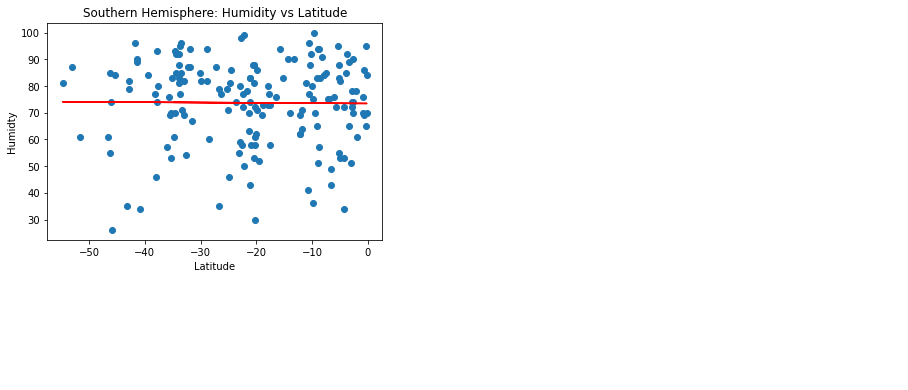

In [19]:
#Southern Hemisphere: Humidty vs Latitude
equation4 = linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Humidity'])
annotate(equation4, 70, -30)
plt.title("Southern Hemisphere: Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidty")
plt.savefig("../Images/Southern Hemisphere Humidity vs Lat.png")

The r-squared is : 0.02


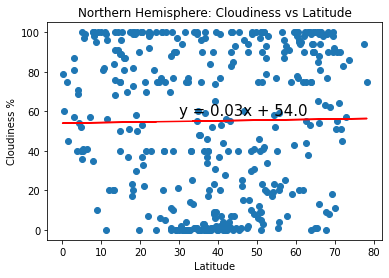

In [20]:
#Northern Hemisphere Cloudiness vs Latitude
equation5 = linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Cloudiness'])
annotate(equation5, 30, 58)
plt.title("Northern Hemisphere: Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.savefig("../Images/Northern Hemisphere Cloudiness vs Lat.png")

The r-squared is : 0.06


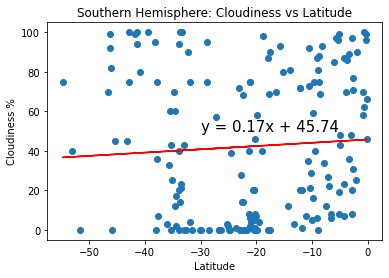

In [21]:
equation6 = linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Cloudiness'])
annotate(equation6, -30, 50)
plt.title("Southern Hemisphere: Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.savefig("../Images/Southern Hemisphere Cloudiness vs Lat.png")

The r-squared is : -0.01


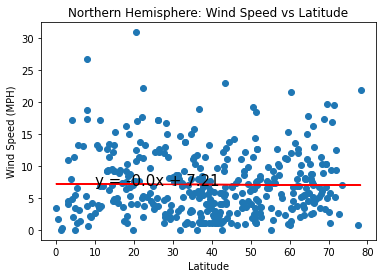

In [22]:
#Northern Hemisphere: Wind Speed vs Lat
equation7 = linear_regression(northern_hemisphere_df['Lat'], northern_hemisphere_df['Wind Speed'])
annotate(equation7, 10, 7)
plt.title("Northern Hemisphere: Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("../Images/Northern Hemisphere Wind vs Lat.png")

The r-squared is : -0.33


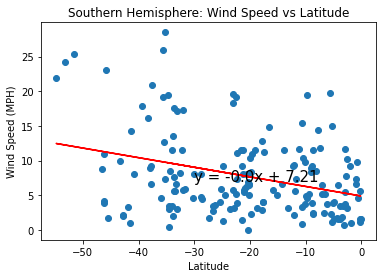

In [23]:
equation8 = linear_regression(southern_hemisphere_df['Lat'], southern_hemisphere_df['Wind Speed'])
annotate(equation7, -30, 7)
plt.title("Southern Hemisphere: Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("../Images/Southern Hemisphere Wind vs Lat.png")

In [24]:
#save city data to a csv file
weather_df.to_csv("../Output Data/cities.csv")